# Get basic sales summary from SQLite using python :-

In [131]:
import sqlite3

### connect to sqlite databas:-

In [133]:
con=sqlite3.connect("sales_data.db")

In [135]:
cur=con.cursor()

### create a sales table:-

In [137]:
cur.execute('''
create table if not exists sales(
product text,
quantity integer,
price real
)
''')

### insert a dataset:-

In [139]:

sales_data = [
    ('Apple', 10, 2.5), ('Banana', 15, 1.0), ('Orange', 8, 3.0),
    ('Apple', 5, 2.5), ('Banana', 7, 1.0), ('Orange', 12, 3.0),
    ('Grapes', 20, 2.0), ('Mango', 10, 4.0), ('Apple', 7, 2.5),
    ('Banana', 10, 1.0), ('Mango', 5, 4.0), ('Grapes', 10, 2.0),
    ('Pineapple', 4, 5.0), ('Pineapple', 6, 5.0), ('Apple', 3, 2.5),
    ('Watermelon', 2, 7.0), ('Watermelon', 3, 7.0), ('Orange', 5, 3.0),
    ('Mango', 8, 4.0), ('Banana', 12, 1.0), ('Grapes', 15, 2.0)
]

In [141]:
cur.executemany('insert into sales values(?,?,?)',sales_data)

In [143]:
con.commit()

In [145]:
import pandas as pd

### Run SQL query :-

In [147]:
query= """
select
    product,
    sum(quantity) as total_qty,
    sum(quantity * price) as revenue
from sales
group by product
"""

### print the sales:-

In [149]:
df= pd.read_sql_query(query,con)

In [151]:
print(df)

      product  total_qty  revenue
0       Apple         40    100.0
1      Banana         66     66.0
2      Grapes         45     90.0
3       Mango         23     92.0
4      Orange         33     99.0
5   Pineapple         10     50.0
6  Watermelon          5     35.0


### visualize revenue per product:-

In [154]:
import matplotlib.pyplot as plt

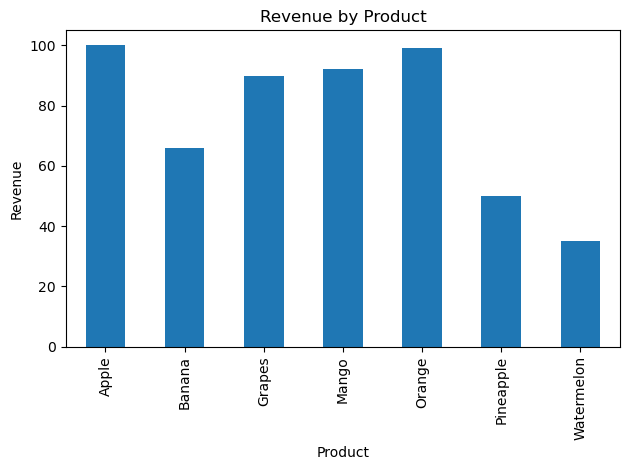

In [156]:
df.plot(kind='bar',x='product',y='revenue',legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("expanded_sales_chart.png")
plt.show()

### close connection:-

In [158]:
con.close()